In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Dense
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
from tensorflow.keras.datasets import boston_housing

In [3]:
(X_train,y_train),(X_test,y_test)=boston_housing.load_data()

In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
model = Sequential()
model.add(Dense(128, input_dim=13, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

In [6]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100)

Epoch 1/100
11/11 [==============================] - 2s 24ms/step - loss: 580.7880 - mae: 22.2727 - val_loss: 623.4595 - val_mae: 23.2268
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 534.4336 - mae: 21.2450 - val_loss: 576.3057 - val_mae: 22.2129
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 483.9997 - mae: 20.0654 - val_loss: 517.0186 - val_mae: 20.8737
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 420.5606 - mae: 18.4892 - val_loss: 437.5483 - val_mae: 18.9767
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 336.8882 - mae: 16.2679 - val_loss: 336.4505 - val_mae: 16.2782
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 237.6173 - mae: 13.2585 - val_loss: 227.9343 - val_mae: 12.7161
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 146.1660 - mae: 9.9028 - val_loss: 141.9785 - val_mae: 9.2983
Epoch 8/100
11/11 [=======================

11/11 [==============================] - 0s 3ms/step - loss: 8.6869 - mae: 2.0601 - val_loss: 16.4199 - val_mae: 2.8755
Epoch 63/100
11/11 [==============================] - 0s 3ms/step - loss: 8.6840 - mae: 2.0622 - val_loss: 15.6612 - val_mae: 2.7891
Epoch 64/100
11/11 [==============================] - 0s 3ms/step - loss: 8.5935 - mae: 2.0266 - val_loss: 15.8651 - val_mae: 2.8677
Epoch 65/100
11/11 [==============================] - 0s 3ms/step - loss: 8.4599 - mae: 2.0281 - val_loss: 16.0627 - val_mae: 2.8236
Epoch 66/100
11/11 [==============================] - 0s 5ms/step - loss: 8.4142 - mae: 2.0492 - val_loss: 15.9675 - val_mae: 2.8171
Epoch 67/100
11/11 [==============================] - 0s 5ms/step - loss: 8.3132 - mae: 2.0107 - val_loss: 15.4558 - val_mae: 2.7980
Epoch 68/100
11/11 [==============================] - 0s 4ms/step - loss: 8.2406 - mae: 1.9990 - val_loss: 15.7723 - val_mae: 2.8160
Epoch 69/100
11/11 [==============================] - 0s 4ms/step - loss: 8.3394 -

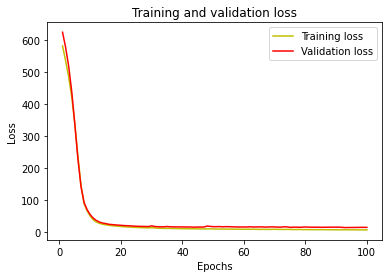

In [8]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [9]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

4/4 [==============================] - 0s 2ms/step - loss: 23.9234 - mae: 3.0865
Mean squared error from neural net:  23.923383712768555
Mean absolute error from neural net:  3.086545467376709


In [10]:
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

1/1 [==============================] - 0s 120ms/step
Predicted values are:  [[ 8.399009]
 [18.548649]
 [20.989925]
 [33.603176]
 [24.98539 ]]
Real values are:  [ 7.2 18.8 19.  27.  22.2]


In [11]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

Mean squared error from linear regression:  23.195599256422977
Mean absolute error from linear regression:  3.4641858124067166
